In [76]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Data Understanding').getOrCreate()

df = spark.read.load('Korea Income and Welfare.csv', format="csv", header=True, inferSchema=True)

In [4]:
df.show(10)

+-----+----+----+------+-----------+-------------+------+---------+---------------+--------+--------+----------+------------+------------------+
|   id|year|wave|region|     income|family_member|gender|year_born|education_level|marriage|religion|occupation|company_size|reason_none_worker|
+-----+----+----+------+-----------+-------------+------+---------+---------------+--------+--------+----------+------------+------------------+
|10101|2005|   1|     1|      614.0|            1|     2|     1936|              2|       2|       2|          |            |                 8|
|10101|2011|   7|     1|      896.0|            1|     2|     1936|              2|       2|       2|          |            |                10|
|10101|2012|   8|     1|     1310.0|            1|     2|     1936|              2|       2|       2|          |            |                10|
|10101|2013|   9|     1|     2208.0|            1|     2|     1936|              2|       2|       2|          |            |     

In [5]:
print('Number of columns: ', len(df.columns))
print('Total number of rows: ', df.count())

Number of columns:  14
Total number of rows:  92857


In [6]:
df.columns

['id',
 'year',
 'wave',
 'region',
 'income',
 'family_member',
 'gender',
 'year_born',
 'education_level',
 'marriage',
 'religion',
 'occupation',
 'company_size',
 'reason_none_worker']

In [7]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- wave: integer (nullable = true)
 |-- region: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- family_member: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- year_born: integer (nullable = true)
 |-- education_level: integer (nullable = true)
 |-- marriage: integer (nullable = true)
 |-- religion: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- company_size: string (nullable = true)
 |-- reason_none_worker: string (nullable = true)



<AxesSubplot:xlabel='education_level', ylabel='income'>

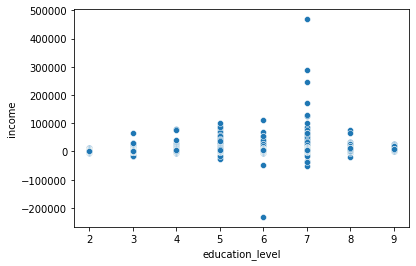

In [73]:
import seaborn as sns
pandasdf=df.toPandas()
sns.scatterplot(data=pandasdf,x="education_level",y='income')

<AxesSubplot:xlabel='region', ylabel='income'>

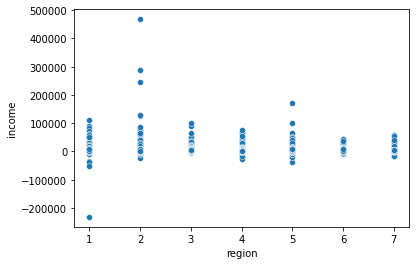

In [10]:
sns.scatterplot(data=pandasdf,x="region",y='income')

<AxesSubplot:xlabel='gender', ylabel='income'>

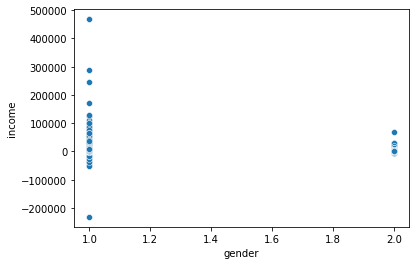

In [11]:
sns.scatterplot(data=pandasdf,x="gender",y='income')

In [13]:
from pyspark.sql.functions import col, isnan, when, count
df2 = df.select([when(col(c) == " ",None).otherwise(col(c)).alias(c) for c in df.columns])
df2.show(10)

+-----+----+----+------+-----------+-------------+------+---------+---------------+--------+--------+----------+------------+------------------+
|   id|year|wave|region|     income|family_member|gender|year_born|education_level|marriage|religion|occupation|company_size|reason_none_worker|
+-----+----+----+------+-----------+-------------+------+---------+---------------+--------+--------+----------+------------+------------------+
|10101|2005|   1|     1|      614.0|            1|     2|     1936|              2|       2|       2|      null|        null|                 8|
|10101|2011|   7|     1|      896.0|            1|     2|     1936|              2|       2|       2|      null|        null|                10|
|10101|2012|   8|     1|     1310.0|            1|     2|     1936|              2|       2|       2|      null|        null|                10|
|10101|2013|   9|     1|     2208.0|            1|     2|     1936|              2|       2|       2|      null|        null|     

In [18]:
df2.select([count(when(isnan(c) | col(c).isNull(), c)
                 ).alias(c) for c in df2.columns]).show(vertical=True)

-RECORD 0-------------------
 id                 | 0     
 year               | 0     
 wave               | 0     
 region             | 0     
 income             | 0     
 family_member      | 0     
 gender             | 0     
 year_born          | 0     
 education_level    | 0     
 marriage           | 0     
 religion           | 0     
 occupation         | 33643 
 company_size       | 33642 
 reason_none_worker | 60710 



In [20]:
att = ("wave","family_member","religion","company_size","reason_none_worker")
df_att = df2.drop(*att)
df_att.show(10)

print('Number of columns: ', len(df_att.columns))
print('Total number of rows: ', df_att.count())

+-----+----+------+-----------+------+---------+---------------+--------+----------+
|   id|year|region|     income|gender|year_born|education_level|marriage|occupation|
+-----+----+------+-----------+------+---------+---------------+--------+----------+
|10101|2005|     1|      614.0|     2|     1936|              2|       2|      null|
|10101|2011|     1|      896.0|     2|     1936|              2|       2|      null|
|10101|2012|     1|     1310.0|     2|     1936|              2|       2|      null|
|10101|2013|     1|     2208.0|     2|     1936|              2|       2|      null|
|10101|2014|     1|      864.0|     2|     1936|              2|       2|      null|
|10101|2015|     1|     1171.0|     2|     1936|              2|       2|      null|
|10101|2016|     1|     1643.0|     2|     1936|              2|       2|      null|
|10101|2017|     1|      851.0|     2|     1936|              2|       2|      null|
|20101|2005|     1|     1257.0|     2|     1945|              4| 

<AxesSubplot:xlabel='income'>

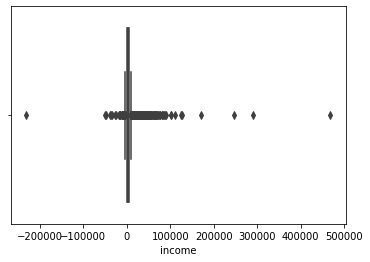

In [74]:
pandasdf_att = df_att.toPandas()
sns.boxplot(data = pandasdf_att, x = "income")

In [22]:
df_row = df_att.where((df_att.year_born>1958) & (df_att.income>0))

print('Number of columns: ', len(df_row.columns))
print('Total number of rows: ', df_row.count())

Number of columns:  9
Total number of rows:  36334


<AxesSubplot:xlabel='income'>

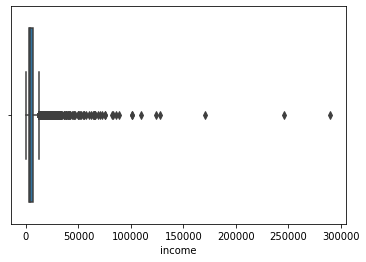

In [23]:
pandasdf_row = df_row.toPandas()
sns.boxplot(data = pandasdf_row, x = "income")

In [25]:
df_row.select([count(when(isnan(c) | col(c).isNull(), c)
        ).alias(c) for c in df_row.columns]).show(vertical=True)

-RECORD 0---------------
 id              | 0    
 year            | 0    
 region          | 0    
 income          | 0    
 gender          | 0    
 year_born       | 0    
 education_level | 0    
 marriage        | 0    
 occupation      | 3514 



In [26]:
df_row = df_row.na.drop(subset=["occupation"])

print('Number of columns: ', len(df_row.columns))
print('Total number of rows: ', df_row.count())

Number of columns:  9
Total number of rows:  32820


In [30]:
boundary = {}
quantiles = df_row.approxQuantile("income",[0.25,0.75], 0)
IQR = quantiles[1] - quantiles[0]
boundary["income"] = [quantiles[0] - 1.5*IQR, quantiles[1] + 1.5*IQR]

print(boundary)

df_outliers = df_row.select(*df_row.columns+[(
    (df_row["income"] < boundary["income"][0]) |
    (df_row["income"]>boundary["income"][1])).alias("income_outlier")])

outliers = df_outliers.filter("income_outlier")
outliers.show(10)

print("Number of extremes and outliers: ", outliers.count())

{'income': [-2549.0, 12331.0]}
+------+----+------+-------+------+---------+---------------+--------+----------+--------------+
|    id|year|region| income|gender|year_born|education_level|marriage|occupation|income_outlier|
+------+----+------+-------+------+---------+---------------+--------+----------+--------------+
|590101|2010|     1|13066.0|     1|     1968|              5|       1|       312|          true|
|590101|2011|     1|14036.0|     1|     1968|              5|       1|       312|          true|
|590101|2015|     1|12465.0|     1|     1968|              5|       1|       312|          true|
|590101|2017|     1|12573.0|     1|     1968|              5|       1|       312|          true|
|590101|2018|     1|13253.0|     1|     1968|              5|       1|       312|          true|
|760101|2013|     1|15541.0|     1|     1973|              6|       1|       399|          true|
|970301|2009|     2|13239.0|     1|     1974|              8|       1|       234|          true|

In [33]:
df_removeoutliers = df_outliers.filter(df_outliers.income_outlier==False) 
new_df = df_removeoutliers.drop("income_outlier")

new_df.show(10)

print('Number of columns: ', len(new_df.columns))
print('Total number of rows: ', new_df.count())

+-----+----+------+------+------+---------+---------------+--------+----------+
|   id|year|region|income|gender|year_born|education_level|marriage|occupation|
+-----+----+------+------+------+---------+---------------+--------+----------+
|60101|2005|     1|2429.0|     1|     1962|              6|       1|       511|
|60101|2006|     1|3109.0|     1|     1962|              6|       1|       511|
|60101|2007|     1|3031.0|     1|     1962|              6|       1|       512|
|60101|2008|     1|1540.0|     1|     1962|              6|       1|       530|
|60101|2009|     1|3564.0|     1|     1962|              6|       1|       530|
|60101|2010|     1|2964.0|     1|     1962|              6|       1|       530|
|60101|2011|     1|3604.0|     1|     1962|              6|       1|       530|
|60101|2012|     1|3116.0|     1|     1962|              6|       1|       530|
|60101|2013|     1|4079.0|     1|     1962|              6|       1|       530|
|60101|2014|     1|3486.0|     1|     19

<AxesSubplot:xlabel='education_level', ylabel='Count'>

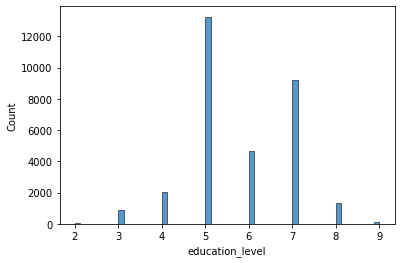

In [34]:
pandasnew_df = new_df.toPandas()
sns.histplot(data = pandasnew_df, x = "education_level")

In [37]:
from pyspark.sql.functions import lit

df_tier = new_df.withColumn("education_tier", \
   when((new_df.education_level < 4), lit("1")) \
     .when((new_df.education_level >= 4) & (new_df.education_level <= 6), lit("2")) \
     .otherwise(lit("3")))

df_tier.printSchema()

df_tier.groupBy('education_tier').count().orderBy('education_tier', ascending=True).show()

root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- region: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- gender: integer (nullable = true)
 |-- year_born: integer (nullable = true)
 |-- education_level: integer (nullable = true)
 |-- marriage: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- education_tier: string (nullable = false)

+--------------+-----+
|education_tier|count|
+--------------+-----+
|             1|  903|
|             2|19933|
|             3|10645|
+--------------+-----+



In [38]:
from pyspark.sql.types import IntegerType
df_tier = df_tier.withColumn("education_tier", df_tier["education_tier"].cast(IntegerType()))
df_tier.printSchema()

root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- region: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- gender: integer (nullable = true)
 |-- year_born: integer (nullable = true)
 |-- education_level: integer (nullable = true)
 |-- marriage: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- education_tier: integer (nullable = true)



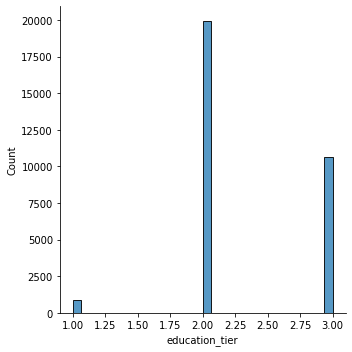

In [39]:
pandasdf_tier = df_tier.toPandas()
sns.displot(data = pandasdf_tier, x = "education_tier")

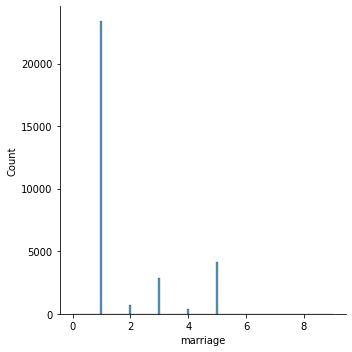

In [41]:
pandasdf_tier = df_tier.toPandas()
sns.displot(data = pandasdf_tier, x = "marriage")

In [43]:
new_df_tier = df_tier.withColumn("marriage_tier", \
   when((df_tier.marriage == 1), lit("1")) \
     .otherwise(lit("0")))

new_df_tier = new_df_tier.withColumn("marriage_tier", new_df_tier["marriage_tier"].cast(IntegerType()))
new_df_tier.printSchema()
new_df_tier.groupBy('marriage_tier').count().orderBy('marriage_tier', ascending=True).show()

root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- region: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- gender: integer (nullable = true)
 |-- year_born: integer (nullable = true)
 |-- education_level: integer (nullable = true)
 |-- marriage: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- education_tier: integer (nullable = true)
 |-- marriage_tier: integer (nullable = true)

+-------------+-----+
|marriage_tier|count|
+-------------+-----+
|            0| 8079|
|            1|23402|
+-------------+-----+



In [44]:
new_df_tier.agg({"Income":"mean"}).show()

+------------------+
|       avg(Income)|
+------------------+
|4901.6867518607405|
+------------------+



In [46]:
new_income_df = new_df_tier.withColumn('income_corrected', new_df_tier.income/100)
new_income_df.show(10)
new_income_df.printSchema()

+-----+----+------+------+------+---------+---------------+--------+----------+--------------+-------------+----------------+
|   id|year|region|income|gender|year_born|education_level|marriage|occupation|education_tier|marriage_tier|income_corrected|
+-----+----+------+------+------+---------+---------------+--------+----------+--------------+-------------+----------------+
|60101|2005|     1|2429.0|     1|     1962|              6|       1|       511|             2|            1|           24.29|
|60101|2006|     1|3109.0|     1|     1962|              6|       1|       511|             2|            1|           31.09|
|60101|2007|     1|3031.0|     1|     1962|              6|       1|       512|             2|            1|           30.31|
|60101|2008|     1|1540.0|     1|     1962|              6|       1|       530|             2|            1|            15.4|
|60101|2009|     1|3564.0|     1|     1962|              6|       1|       530|             2|            1|          

In [48]:
new_income_tier = new_income_df.withColumn("income_tier", \
   when((new_income_df.income_corrected < 12), lit("1")) \
     .when((new_income_df.income_corrected >= 12) & (new_income_df.income_corrected < 46), lit("2")) \
     .when((new_income_df.income_corrected >= 46) & (new_income_df.income_corrected < 88), lit("3")) \
     .when((new_income_df.income_corrected >= 88) & (new_income_df.income_corrected < 150), lit("4")) \
     .otherwise(lit("5")))

new_income_tier = new_income_tier.withColumn("income_tier", new_income_tier["income_tier"].cast(IntegerType()))
new_income_tier.printSchema()

new_income_tier.groupBy('income_tier').count().orderBy('income_tier', ascending=True).show()

root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- region: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- gender: integer (nullable = true)
 |-- year_born: integer (nullable = true)
 |-- education_level: integer (nullable = true)
 |-- marriage: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- education_tier: integer (nullable = true)
 |-- marriage_tier: integer (nullable = true)
 |-- income_corrected: double (nullable = true)
 |-- income_tier: integer (nullable = true)

+-----------+-----+
|income_tier|count|
+-----------+-----+
|          1|  719|
|          2|15666|
|          3|12285|
|          4| 2811|
+-----------+-----+



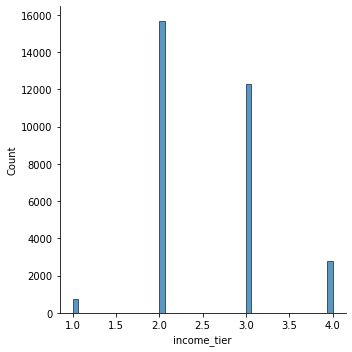

In [75]:
pandasdnew_income_tier = new_income_tier.toPandas()
sns.displot(data = pandasdnew_income_tier, x = "income_tier")

In [50]:
print('Number of columns: ', len(new_income_tier.columns))
print('Total number of rows: ', new_income_tier.count())

Number of columns:  13
Total number of rows:  31481


In [53]:
df_job = spark.read.csv("job_code_translated.csv", header=False, inferSchema=True)
df_job.show(10)

+--------+----+--------------------+--------+--------------------+
|     _c0| _c1|                 _c2|     _c3|                 _c4|
+--------+----+--------------------+--------+--------------------+
|  대분류|null|                null|job_code|           job_title|
|1 관리자|  11|Senior public and...|     111|Assembly members,...|
|    null|null|                null|     112|senior corporate ...|
|    null|  12|Administrative an...|     120|Administrative an...|
|    null|  13|Professional serv...|     131|Research, educati...|
|    null|null|                null|     132|Insurance and Fin...|
|    null|null|                null|     133|Health and social...|
|    null|null|                null|     134|Managers related ...|
|    null|null|                null|     135|Information and c...|
|    null|null|                null|     139|Other professiona...|
+--------+----+--------------------+--------+--------------------+
only showing top 10 rows



In [56]:
job_att = ("_c0","_c3","_c4")
new_job = df_job.drop(*job_att)
new_job = new_job.na.drop()

new_job = new_job.withColumnRenamed("_c1","occupation_code") \
            .withColumnRenamed("_c2","job_title")

new_job.show(20, False)

print('Number of columns: ', len(new_job.columns))
print('Total number of rows: ', new_job.count())

+---------------+---------------------------------------------------------------------+
|occupation_code|job_title                                                            |
+---------------+---------------------------------------------------------------------+
|11             |Senior public and corporate positions                                |
|12             |Administrative and management support managerial positions           |
|13             |Professional service manager                                         |
|14             |Construction, electricity and production-related managerial positions|
|15             |Sales and customer service management positions                      |
|21             |Scientific experts and related positions                             |
|22             |Information and communication specialists and technical positions    |
|23             |Engineering professionals and technical positions                    |
|24             |Health, social 

In [57]:
from pyspark.sql import functions as F
new_income_tier = new_income_tier.withColumn("occupation_code", (F.col('occupation')/10).cast('int'))
new_income_tier.show(10)

+-----+----+------+------+------+---------+---------------+--------+----------+--------------+-------------+----------------+-----------+---------------+
|   id|year|region|income|gender|year_born|education_level|marriage|occupation|education_tier|marriage_tier|income_corrected|income_tier|occupation_code|
+-----+----+------+------+------+---------+---------------+--------+----------+--------------+-------------+----------------+-----------+---------------+
|60101|2005|     1|2429.0|     1|     1962|              6|       1|       511|             2|            1|           24.29|          2|             51|
|60101|2006|     1|3109.0|     1|     1962|              6|       1|       511|             2|            1|           31.09|          2|             51|
|60101|2007|     1|3031.0|     1|     1962|              6|       1|       512|             2|            1|           30.31|          2|             51|
|60101|2008|     1|1540.0|     1|     1962|              6|       1|       5

In [58]:
new_dataframe = new_income_tier.join(new_job, 
                    new_income_tier.occupation_code == new_job.occupation_code).drop(new_job.occupation_code)
new_dataframe.show(10, False)

+-----+----+------+------+------+---------+---------------+--------+----------+--------------+-------------+----------------+-----------+---------------+--------------------------------------------+
|id   |year|region|income|gender|year_born|education_level|marriage|occupation|education_tier|marriage_tier|income_corrected|income_tier|occupation_code|job_title                                   |
+-----+----+------+------+------+---------+---------------+--------+----------+--------------+-------------+----------------+-----------+---------------+--------------------------------------------+
|60101|2005|1     |2429.0|1     |1962     |6              |1       |511       |2             |1            |24.29           |2          |51             |Sales job                                   |
|60101|2006|1     |3109.0|1     |1962     |6              |1       |511       |2             |1            |31.09           |2          |51             |Sales job                                   |
|6010

In [59]:
new_dataframe.printSchema()

new_dataframe.withColumn("occupation",new_dataframe.occupation.cast(IntegerType()))
new_dataframe.printSchema()

root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- region: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- gender: integer (nullable = true)
 |-- year_born: integer (nullable = true)
 |-- education_level: integer (nullable = true)
 |-- marriage: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- education_tier: integer (nullable = true)
 |-- marriage_tier: integer (nullable = true)
 |-- income_corrected: double (nullable = true)
 |-- income_tier: integer (nullable = true)
 |-- occupation_code: integer (nullable = true)
 |-- job_title: string (nullable = true)

root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- region: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- gender: integer (nullable = true)
 |-- year_born: integer (nullable = true)
 |-- education_level: integer (nullable = true)
 |-- marriage: integer (nullable = true)
 |-- occupation: string (nullable =

In [61]:
att_remove = ("id","income","education_level","marriage","occupation","income_corrected","job_title")
new_dataframe_att = new_dataframe.drop(*att_remove)
new_dataframe_att.show(10)

print('Number of columns: ', len(new_dataframe_att.columns))
print('Total number of rows: ', new_dataframe_att.count())

+----+------+------+---------+--------------+-------------+-----------+---------------+
|year|region|gender|year_born|education_tier|marriage_tier|income_tier|occupation_code|
+----+------+------+---------+--------------+-------------+-----------+---------------+
|2005|     1|     1|     1962|             2|            1|          2|             51|
|2006|     1|     1|     1962|             2|            1|          2|             51|
|2007|     1|     1|     1962|             2|            1|          2|             51|
|2008|     1|     1|     1962|             2|            1|          2|             53|
|2009|     1|     1|     1962|             2|            1|          2|             53|
|2010|     1|     1|     1962|             2|            1|          2|             53|
|2011|     1|     1|     1962|             2|            1|          2|             53|
|2012|     1|     1|     1962|             2|            1|          2|             53|
|2013|     1|     1|     1962|  

In [63]:
new_dataframe_att.groupBy('gender'
    ).count().orderBy('gender', ascending=True).show()

+------+-----+
|gender|count|
+------+-----+
|     1|26623|
|     2| 4326|
+------+-----+



In [67]:
from pyspark.sql.functions import explode, array

major_df1 = new_dataframe_att.filter(col("gender") == 1)
minor_df1 = new_dataframe_att.filter(col("gender") == 2)

ratio1 = int(major_df1.count()/minor_df1.count())

a = range(ratio1)
oversampled_df1 = minor_df1.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')

In [69]:
final_df = major_df1.unionAll(oversampled_df1)
final_df.groupBy('gender').count().orderBy('gender', ascending=True).show()

print('Number of columns: ', len(final_df.columns))
print('Total number of rows: ', final_df.count())

+------+-----+
|gender|count|
+------+-----+
|     1|26623|
|     2|25956|
+------+-----+

Number of columns:  8
Total number of rows:  52579


In [70]:
final_df.write.csv("Korea Income and Welfare Output.csv", header=True)